###Demonstrate using the simulator at the region level, stochastic integration.

``Run time``: approximately 2 seconds (workstation circa 2010)

``Memory requirement``: < 1GB

In [2]:
from tvb.simulator.lab import *

####Perform the simulation

In [3]:
LOG.info("Configuring...")

In [4]:
#Initialise a Model, Coupling, and Connectivity.
oscillator = models.Generic2dOscillator()
white_matter = connectivity.Connectivity(load_default=True)
white_matter.speed = numpy.array([8.0])

white_matter_coupling = coupling.Linear(a=0.0152)

In [5]:
#Initialise an Integrator
# set numpy's seed
my_seed = 13
my_random_state = numpy.random.RandomState(my_seed)

hiss = noise.Additive(nsig=0.08)
heunint = integrators.HeunStochastic(dt=2 ** -2, noise=hiss)
heunint.configure()

In [6]:
#Initialise some Monitors with period in physical time
momo = monitors.Raw()
mama = monitors.TemporalAverage(period=2 ** -1)

#Bundle them
what_to_watch = (momo, mama)

In [7]:
#Initialise a Simulator -- Model, Connectivity, Integrator, and Monitors.
sim = simulator.Simulator(model=oscillator, connectivity=white_matter,
                          coupling=white_matter_coupling,
                          integrator=heunint, monitors=what_to_watch)
sim.configure()


In [8]:
LOG.info("Starting simulation...")
#Perform the simulation
raw_data = []
raw_time = []
tavg_data = []
tavg_time = []
for raw, tavg in sim(simulation_length=2 ** 6, random_state=my_random_state.get_state()):

    if not raw is None:
        raw_time.append(raw[0])
        raw_data.append(raw[1])

    if not tavg is None:
        tavg_time.append(tavg[0])
        tavg_data.append(tavg[1])

LOG.info("Finished simulation.")

####Plot pretty pictures of what we just did   

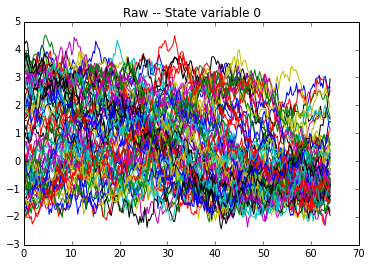

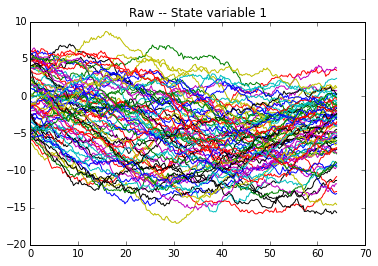

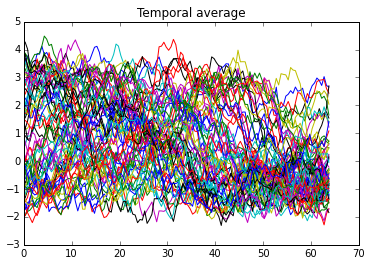

In [9]:
#Plot defaults in a few combinations

#Make the lists numpy.arrays for easier use.
RAW = numpy.array(raw_data)
TAVG = numpy.array(tavg_data)

#Plot raw time series
figure(1)
plot(raw_time, RAW[:, 0, :, 0])
title("Raw -- State variable 0")

figure(2)
plot(raw_time, RAW[:, 1, :, 0])
title("Raw -- State variable 1")

#Plot temporally averaged time series
figure(3)
plot(tavg_time, TAVG[:, 0, :, 0])
title("Temporal average")

#Show them
show()